# Fundamentals of Predictive Modelling

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 3 Predictive Modelling\Live Class Data Sets")

In [4]:
# Import Data
perindex = pd.read_csv("Performance Index.csv")
print("✅ Dataset Loaded Successfully")
perindex.head(10)
print(perindex.info())
print(perindex.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   empid      33 non-null     int64  
 1   jpi        33 non-null     float64
 2   aptitude   33 non-null     float64
 3   tol        33 non-null     float64
 4   technical  33 non-null     float64
 5   general    33 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.7 KB
None
          empid        jpi   aptitude        tol  technical    general
count  33.00000  33.000000  33.000000  33.000000   33.00000  33.000000
mean   17.00000  47.865758  52.660606  53.990606   52.01697  49.036364
std     9.66954   9.458342  10.054991  10.149654    4.98145   5.636432
min     1.00000  31.640000  32.710000  32.560000   41.25000  37.000000
25%     9.00000  41.190000  45.590000  44.890000   48.34000  45.070000
50%    17.00000  49.450000  53.380000  57.040000   51.64000  50.530

In [18]:
perindex.head(10)

,empid,jpi,aptitude,tol,technical,general,pred,resid
0,1,45.52,43.83,55.92,51.82,43.58,41.738503,3.781497
1,2,40.10,32.71,32.56,51.49,51.03,41.709731,-1.609731
2,3,50.61,56.64,54.84,52.29,52.47,51.362151,-0.752151
3,4,38.97,51.53,59.69,47.48,47.69,41.691486,-2.721486
4,5,41.87,51.35,51.50,47.59,45.77,40.711451,1.158549
5,6,38.71,39.60,43.63,48.34,42.06,35.616990,3.093010
6,7,31.64,61.08,39.09,41.25,37.00,32.112006,-0.472006
7,8,59.84,53.38,61.13,58.08,52.28,56.637510,3.202490
8,9,53.92,56.75,60.62,53.28,54.01,53.340742,0.579258
9,10,50.01,61.31,44.69,54.18,49.14,53.220587,-3.210587


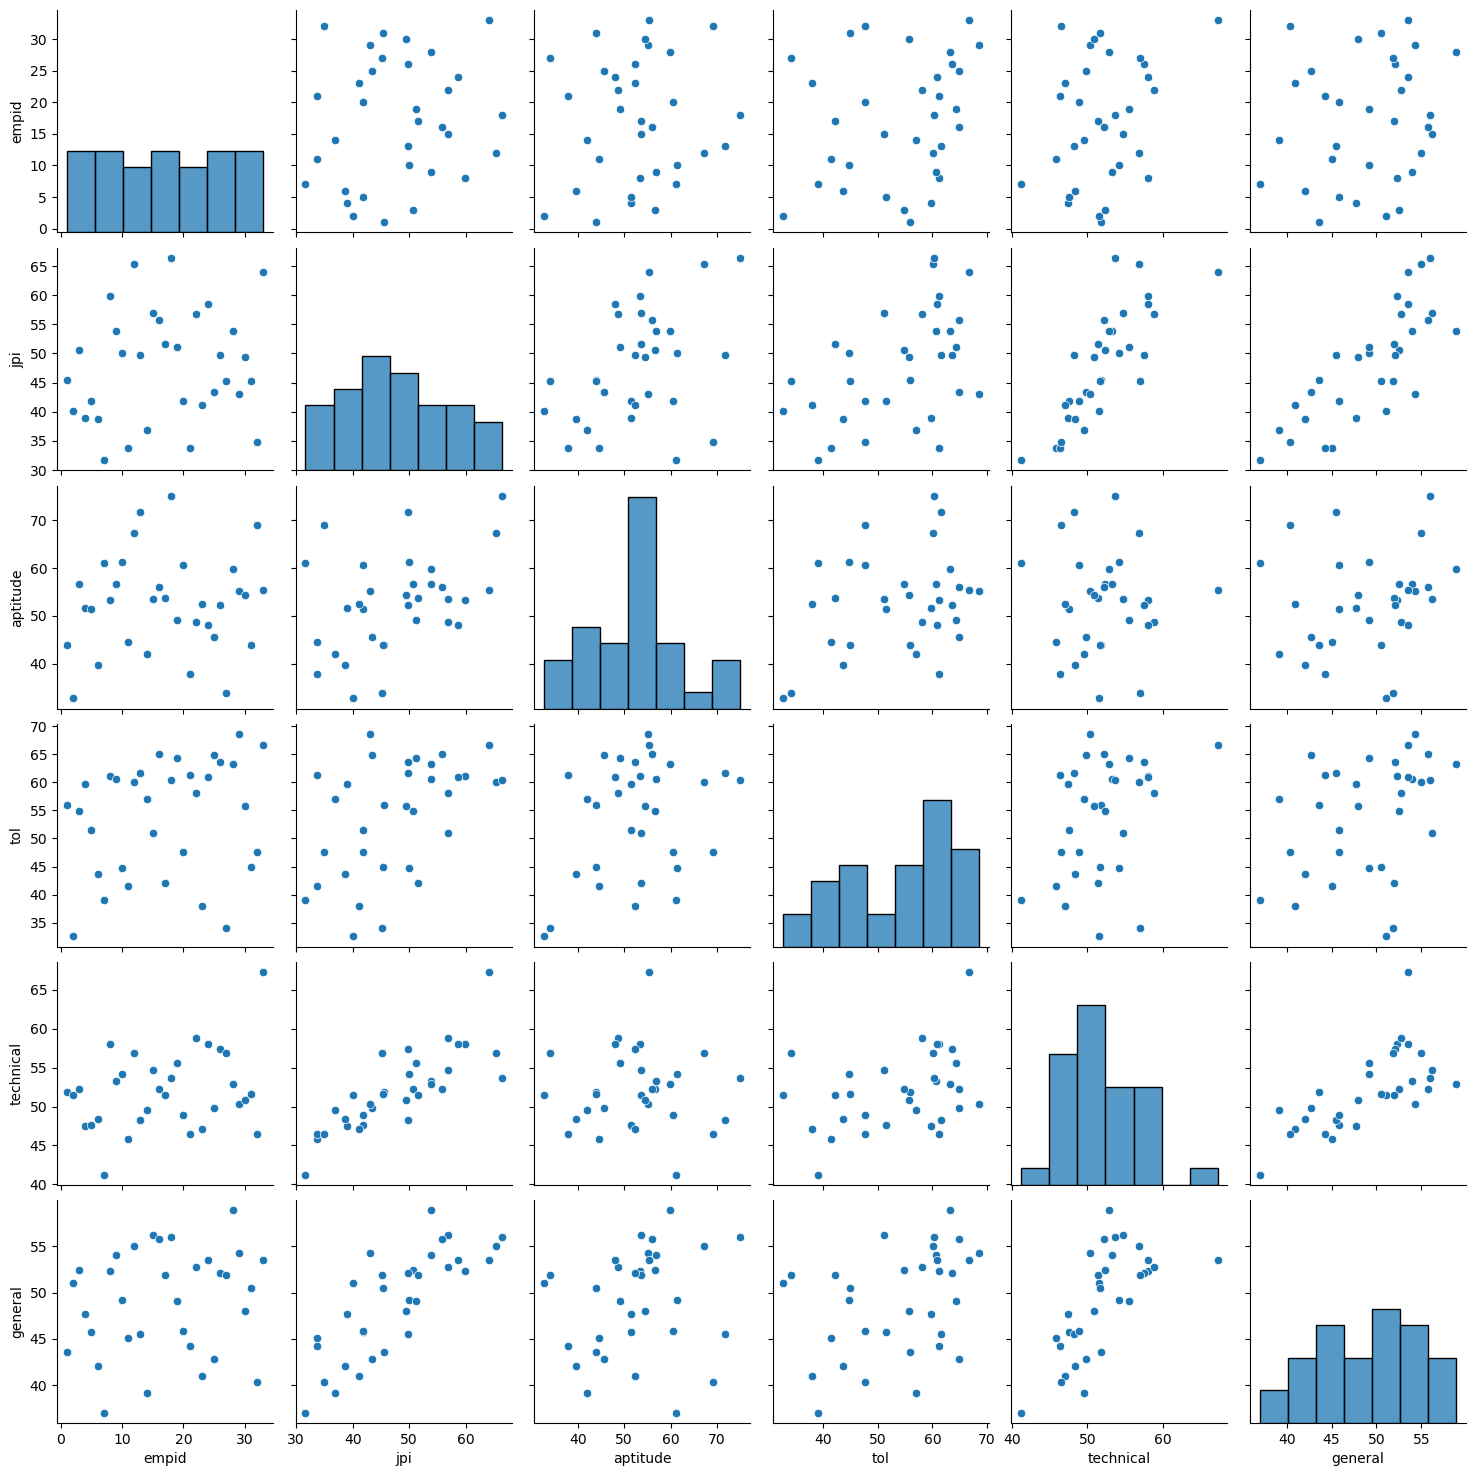

In [5]:
# Graphical Presentation

sns.pairplot(perindex)

In [8]:
# Model fitting
jpimodel = smf.ols("jpi~tol+aptitude+technical+general", data=perindex).fit()
jpimodel.params


Intercept   -54.282247
tol           0.033372
aptitude      0.323562
technical     1.095467
general       0.536834
dtype: float64

# OUTPUT: tol (0.03): For every 1 unit increase in tol, jpi increases by 0.03 units, assuming other variables are held constant.

In [9]:
# Understanding the summary output
print(jpimodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    jpi   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.81
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           2.47e-12
Time:                        08:44:27   Log-Likelihood:                -85.916
No. Observations:                  33   AIC:                             181.8
Df Residuals:                      28   BIC:                             189.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.2822      7.395     -7.341      0.0

Interpretation :  
  Reject Global Testing null hypothesis that no variables are significant as p-value is<0.05
  Intercept, aptitude, technical, general are significant variables (p-values<0.05)
  tol  is not significant (p-value>0.05)


In [10]:
# Fitted Values and Residuals

jpimodel_new = smf.ols("jpi~aptitude+technical+general", data=perindex).fit()
jpimodel_new.params

Intercept   -54.406443
aptitude      0.333346
technical     1.116627
general       0.543157
dtype: float64

In [21]:
# Adding Fitted Values and Residuals to the Original Dataset
perindex=perindex.assign(pred=pd.Series(jpimodel_new.fittedvalues.values.round(2)))
perindex=perindex.assign(resid=pd.Series(jpimodel_new.resid.values.round(2)))
perindex.head(10)

,empid,jpi,aptitude,tol,technical,general,pred,resid
0,1,45.52,43.83,55.92,51.82,43.58,41.74,3.78
1,2,40.10,32.71,32.56,51.49,51.03,41.71,-1.61
2,3,50.61,56.64,54.84,52.29,52.47,51.36,-0.75
3,4,38.97,51.53,59.69,47.48,47.69,41.69,-2.72
4,5,41.87,51.35,51.50,47.59,45.77,40.71,1.16
5,6,38.71,39.60,43.63,48.34,42.06,35.62,3.09
6,7,31.64,61.08,39.09,41.25,37.00,32.11,-0.47
7,8,59.84,53.38,61.13,58.08,52.28,56.64,3.20
8,9,53.92,56.75,60.62,53.28,54.01,53.34,0.58
9,10,50.01,61.31,44.69,54.18,49.14,53.22,-3.21


Predictions for new Dataset

In [23]:
perindex_new = pd.read_csv("Performance Index new.csv")
print("✅ Dataset Loaded Successfully")


✅ Dataset Loaded Successfully


In [24]:
perindex_new=perindex_new.assign(pred=pd.Series(jpimodel_new.predict(perindex_new.round(2))))
perindex_new.head(10)

,empid,jpi,tol,technical,general,aptitude,pred
0,34,66.35,59.20,57.18,54.98,66.74,61.552576
1,35,56.10,64.92,52.51,55.78,55.45,53.008978
2,36,48.95,63.59,57.76,52.08,51.73,55.621537
3,37,43.25,64.90,50.13,42.75,45.09,39.820600
4,38,41.20,51.50,47.89,45.77,50.85,40.879766
5,39,50.24,55.77,51.13,47.98,53.86,46.701385


Predictions with Confidence Interval

In [25]:
result = jpimodel_new.get_prediction(perindex_new)
result.conf_int()

array([[59.00955719, 64.09559387],
       [50.67791702, 55.34003898],
       [53.65401364, 57.58906082],
       [37.73389546, 41.90730465],
       [39.23363549, 42.52589584],
       [45.41626758, 47.98650295]])

In [29]:
result = jpimodel_new.get_prediction(perindex_new)
result.conf_int(alpha=0.1)

array([[59.43989777, 63.6652533 ],
       [51.07238925, 54.94556675],
       [53.9869665 , 57.25610796],
       [38.08701664, 41.55418346],
       [39.51220077, 42.24733056],
       [45.63374076, 47.76902977]])